In [13]:
# Standard library imports
from time import time
import os

# Third-party library imports
import numpy as np
import matplotlib.pyplot as plt

# PyTorch and torchvision imports
import torch
from torch import nn, optim
import torchvision
from torchvision import datasets, transforms

In [14]:
# Create a normalization transform with mean=0.5 and std=0.5
normalize_transform = transforms.Normalize((0.5,), (0.5,))

# Create a transform to convert data to tensor
to_tensor_transform = transforms.ToTensor()

# Compose the above two transforms
composed_transforms = transforms.Compose([to_tensor_transform, normalize_transform])

In [15]:
# Constants for DataLoader
BATCH_SIZE = 64

# Get the current working directory
current_dir = os.getcwd()

# Load MNIST training and testing datasets with applied transformations
mnist_train_dataset = datasets.MNIST(current_dir, download=True, train=True, transform=composed_transforms)
mnist_test_dataset = datasets.MNIST(current_dir, download=True, train=False, transform=composed_transforms)

# Create DataLoaders for training and testing datasets
train_dataloader = torch.utils.data.DataLoader(mnist_train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(mnist_test_dataset, batch_size=BATCH_SIZE, shuffle=True)

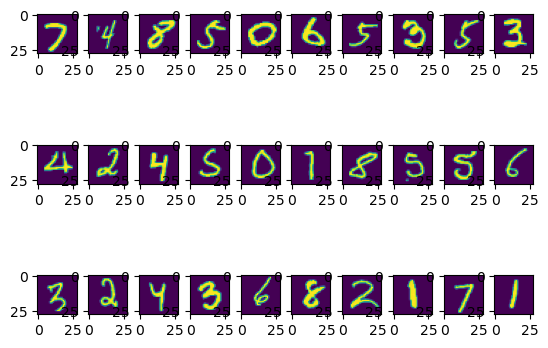

In [16]:
# Constants for Visualization
NUM_IMAGES = 30
GRID_ROWS = 3
GRID_COLS = 10

def visualize_samples(image_batch, num_images=NUM_IMAGES, grid_rows=GRID_ROWS, grid_cols=GRID_COLS):
    """Visualize a batch of image samples."""
    for i in range(1, num_images + 1):
        plt.subplot(grid_rows, grid_cols, i)
        plt.subplots_adjust(wspace=0.3)
        plt.imshow(image_batch[i].numpy().squeeze())

# Fetch a batch of training data
images, labels = next(iter(train_dataloader))

# Visualize the first 30 images from the training data
visualize_samples(images)

In [17]:
# Define constants for the neural network architecture

# Input layer corresponds to the flattened 28x28 MNIST image
INPUT_LAYER_SIZE = 784

# Two hidden layers with 64 and 32 neurons respectively
HIDDEN_LAYER1_SIZE = 64
HIDDEN_LAYER2_SIZE = 32

# Output layer corresponds to the 10 digits (0-9)
OUTPUT_LAYER_SIZE = 10

In [18]:
# Define the neural network model using nn.Sequential
model = nn.Sequential(
    # First Linear layer from INPUT_LAYER_SIZE to HIDDEN_LAYER1_SIZE
    nn.Linear(INPUT_LAYER_SIZE, HIDDEN_LAYER1_SIZE),
    # ReLU activation for the first hidden layer
    nn.ReLU(),
    # Second Linear layer from HIDDEN_LAYER1_SIZE to HIDDEN_LAYER2_SIZE
    nn.Linear(HIDDEN_LAYER1_SIZE, HIDDEN_LAYER2_SIZE),
    # ReLU activation for the second hidden layer
    nn.ReLU(),
    # Output Linear layer from HIDDEN_LAYER2_SIZE to OUTPUT_LAYER_SIZE
    nn.Linear(HIDDEN_LAYER2_SIZE, OUTPUT_LAYER_SIZE)
)

In [19]:
# Flatten the images to match the input size of the neural network
flattened_images = images.view(images.shape[0], -1)

# Perform a forward pass through the model to get the outputs
model_outputs = model(flattened_images)

# Define the Cross-Entropy loss function (this should usually be defined once outside the loop)
cross_entropy_loss = nn.CrossEntropyLoss()

# Compute the loss between the model outputs and true labels
computed_loss = cross_entropy_loss(model_outputs, labels)

In [20]:
# Define the learning rate for the optimizer
LEARNING_RATE = 0.1

# Initialize the Stochastic Gradient Descent (SGD) optimizer
sgd_optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE)

In [21]:
# Define the number of epochs for training
NUM_EPOCHS = 100

# Main training loop
for epoch in range(NUM_EPOCHS):
    # Initialize running loss at the start of each epoch
    running_loss = 0.0
    
    for images, labels in train_dataloader:
        # Flatten images and perform a forward pass to compute loss
        flattened_images = images.view(images.shape[0], -1)
        sgd_optimizer.zero_grad()
        computed_loss = cross_entropy_loss(model(flattened_images), labels)
        
        # Backward pass and weight optimization
        computed_loss.backward()
        sgd_optimizer.step()
        
        # Update running loss
        running_loss += computed_loss.item() * images.size(0)
        
    # Calculate and display the loss for the current epoch
    epoch_loss = running_loss / len(train_dataloader.dataset)
    print(f"Iteration: {epoch+1}\tLoss: {epoch_loss}")

Iteration: 1	Loss: 0.49066636469364167
Iteration: 2	Loss: 0.19841884572903315
Iteration: 3	Loss: 0.15248024460673332
Iteration: 4	Loss: 0.1221647479891777
Iteration: 5	Loss: 0.1078218552817901
Iteration: 6	Loss: 0.09540601528187592
Iteration: 7	Loss: 0.0871127181785802
Iteration: 8	Loss: 0.07843637547592322
Iteration: 9	Loss: 0.07293924033455551
Iteration: 10	Loss: 0.06722344802369674
Iteration: 11	Loss: 0.06256493092775345
Iteration: 12	Loss: 0.05540743311389039
Iteration: 13	Loss: 0.05138164607596894
Iteration: 14	Loss: 0.051124917567769684
Iteration: 15	Loss: 0.04664647419297447
Iteration: 16	Loss: 0.04499496864204605
Iteration: 17	Loss: 0.041236077595750494
Iteration: 18	Loss: 0.039052694057828435
Iteration: 19	Loss: 0.03659179907223831
Iteration: 20	Loss: 0.035334613142473
Iteration: 21	Loss: 0.03480693848316247
Iteration: 22	Loss: 0.029793134709602844
Iteration: 23	Loss: 0.02984283555302148
Iteration: 24	Loss: 0.02717234111924966
Iteration: 25	Loss: 0.0268759396397043
Iteration: 

In [22]:
# Define constant for flattened image size
FLATTENED_IMAGE_SIZE = 28 * 28

def predict_digit_label(input_image):
    """Predict the digit label for a given image using the trained model."""
    # Reshape the image to be compatible with the model input
    reshaped_image = input_image.view(1, FLATTENED_IMAGE_SIZE)
    
    # Forward pass to get prediction scores
    with torch.no_grad():
        prediction_scores = model(reshaped_image)
        
    # Return the label with the highest prediction score
    return np.argmax(prediction_scores)

In [23]:
# Fetch a batch of test data
test_images, test_labels = next(iter(test_dataloader))

# Predict the label for the first test image
predicted_label = predict_digit_label(test_images[0])

# Fetch the actual label for the first test image
actual_label = test_labels.numpy()[0]

# Print the predicted and actual labels
print(f"Predicted Label: {predicted_label}")
print(f"Actual Label: {actual_label}")

Predicted Label: 2
Actual Label: 2


In [24]:
def evaluate_model(test_dataloader, model):
    """Evaluate the model's performance on the test dataset."""
    total_count = 0
    accurate_count = 0
    
    for images, labels in test_dataloader:
        for i in range(len(labels)):
            predicted_label = predict_digit_label(images[i])
            actual_label = labels.numpy()[i]
            
            # Increment the accurate count if the prediction is correct
            if predicted_label == actual_label:
                accurate_count += 1
            
            print(f"Predicted Label: {predicted_label} / Actual Label: {actual_label}")
        
        # Update the total count
        total_count += len(labels)
    
    # Calculate and print the accuracy
    accuracy = (accurate_count / total_count) * 100
    print(f"Total images tested: {total_count}")
    print(f"Accurate predictions: {accurate_count}")
    print(f"Accuracy percentage: {accuracy:.2f}%")

# Call the function to evaluate the model
evaluate_model(test_dataloader, model)

Predicted Label: 7 / Actual Label: 7
Predicted Label: 8 / Actual Label: 8
Predicted Label: 2 / Actual Label: 2
Predicted Label: 6 / Actual Label: 6
Predicted Label: 8 / Actual Label: 8
Predicted Label: 0 / Actual Label: 0
Predicted Label: 2 / Actual Label: 2
Predicted Label: 2 / Actual Label: 2
Predicted Label: 9 / Actual Label: 9
Predicted Label: 5 / Actual Label: 5
Predicted Label: 4 / Actual Label: 4
Predicted Label: 5 / Actual Label: 5
Predicted Label: 4 / Actual Label: 9
Predicted Label: 7 / Actual Label: 7
Predicted Label: 9 / Actual Label: 9
Predicted Label: 4 / Actual Label: 4
Predicted Label: 2 / Actual Label: 2
Predicted Label: 4 / Actual Label: 4
Predicted Label: 9 / Actual Label: 9
Predicted Label: 0 / Actual Label: 6
Predicted Label: 1 / Actual Label: 1
Predicted Label: 8 / Actual Label: 8
Predicted Label: 1 / Actual Label: 1
Predicted Label: 5 / Actual Label: 5
Predicted Label: 2 / Actual Label: 2
Predicted Label: 4 / Actual Label: 4
Predicted Label: 1 / Actual Label: 1
P